In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
Zomato = pd.read_csv("zomato.csv")
Zomato.head(10)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,https://www.zomato.com/bangalore/timepass-dinn...,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8/5,286,+91 9980040002\r\n+91 9980063005,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
6,https://www.zomato.com/bangalore/rosewood-inte...,"19/1, New Timberyard Layout, Beside Satellite ...",Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,+91 9731716688\r\n080 26740366,Mysore Road,Casual Dining,NaN,"North Indian, South Indian, Andhra, Chinese",800,"[('Rated 5.0', 'RATED\n Awesome food ??Great ...",[],Buffet,Banashankari
7,https://www.zomato.com/bangalore/onesta-banash...,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6/5,2556,080 48653961\r\n080 48655715,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,https://www.zomato.com/bangalore/penthouse-caf...,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0/5,324,+91 8884135549\r\n+91 9449449316,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,https://www.zomato.com/bangalore/smacznego-ban...,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2/5,504,+91 9945230807\r\n+91 9743804471,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari


In [3]:
Zomato.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [4]:
#Zomato.info()

In [5]:
#Zomato.isnull().sum()

# **Data Cleaning**

**Remove Unwanted columns**

In [6]:
Zomato.drop(['phone', 'url', 'address', 'reviews_list', 'menu_item', 'dish_liked', 'listed_in(type)'], axis = 1, inplace = True)
Zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


**Rename data columns**

In [7]:
Zomato.rename(columns = {"approx_cost(for two people)" : "approx_cost", "listed_in(city)":"area"}, inplace =True)

**remove the unknown character from the dataset**

In [8]:
Zomato = Zomato[Zomato['name'].str.contains('RATED|Rated') == False]


In [9]:
Zomato['name'] = Zomato['name'].str.replace('[Ãx][^A-Za-z]+','',regex=True)

In [10]:
Zomato.head(20)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari
5,Timepass Dinner,Yes,No,3.8/5,286,Basavanagudi,Casual Dining,North Indian,600,Banashankari
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800,Banashankari
7,Onesta,Yes,Yes,4.6/5,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600,Banashankari
8,Penthouse Cafe,Yes,No,4.0/5,324,Banashankari,Cafe,"Cafe, Italian, Continental",700,Banashankari
9,Smacznego,Yes,No,4.2/5,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550,Banashankari


**Check null values and Handling missing/Unnecessary  data**

In [11]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


**Rating column**

Checking unique values in Rateing colomn

In [12]:
Zomato.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

we can see that few unique value are present in data like 'NEW' , nan , - , syntax. Now we have to deal with this data.

In [13]:
Zomato['rate'] = Zomato['rate'].str.replace("/5" , "")
Zomato['rate'] = Zomato['rate'].str.replace("NEW" , "NAN")
Zomato['rate'] = Zomato['rate'].str.replace("nan" , "NAN")
Zomato['rate'] = Zomato['rate'].str.replace(" /5" , "")
Zomato['rate'] = Zomato['rate'].str.replace("-" , "NAN")
Zomato['rate'] = Zomato['rate'].str.replace(" " , "")
Zomato['rate'] = Zomato['rate'].fillna(np.nan)

In [14]:
#Varify the column has unique value 
Zomato['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NAN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

**Approx_cost Column**

In [15]:
Zomato['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

**There are some null values and object data type**

In [16]:
Zomato['approx_cost'] = Zomato['approx_cost'].str.replace("nan", "NAN")
Zomato['approx_cost'] = Zomato['approx_cost'].fillna('NAN')
Zomato['approx_cost'] = Zomato['approx_cost'].str.replace(",", "")



In [17]:
Zomato['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NAN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

In [18]:
Zomato['approx_cost'] = Zomato['approx_cost'].astype(float)
Zomato['rate'] = Zomato['rate'].astype(float)


In [19]:
Zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


**Checking NuLL Values**

In [20]:
Zomato.isnull().sum()


name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

In [21]:
(Zomato.isna().sum()/ Zomato.shape[0]) *100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

Drop all null values

In [22]:
Zomato = Zomato[Zomato["location"].notna()]
Zomato = Zomato[Zomato["rest_type"].notna()]
Zomato = Zomato[Zomato["cuisines"].notna()]
Zomato = Zomato[Zomato["approx_cost"].notna()]
Zomato.isnull().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

15% Null values are present is Rate Column, If we drop then it will affect accuracy of model so we will use Mean, Mode, Median

In [23]:
Zomato["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

First before applying Stats we have to know outliers
so first we will check outlier 

In [24]:
q1 = Zomato['rate'].quantile(0.25)
q3 = Zomato['rate'].quantile(0.75)

iqr = q3 - q1


lower_range = q1 - (1.5 * iqr)
upper_range = q3 - (1.5 * iqr)


outlier = len(Zomato[(Zomato["rate"]<lower_range) | (Zomato["rate"]<upper_range)])
print("number of outlier : " , outlier)

number of outlier :  3207


In [25]:
Zomato['rate'] = Zomato['rate'].fillna(Zomato['rate'].median())

In [26]:
Zomato.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

In [27]:
Zomato.reset_index(inplace=True)
Zomato.drop(['index'], inplace =True, axis=1)

In [28]:
Zomato.shape

(51148, 10)

# **Data Visualization**

**No. of order  vs Restaurants**

<function matplotlib.pyplot.show(close=None, block=None)>

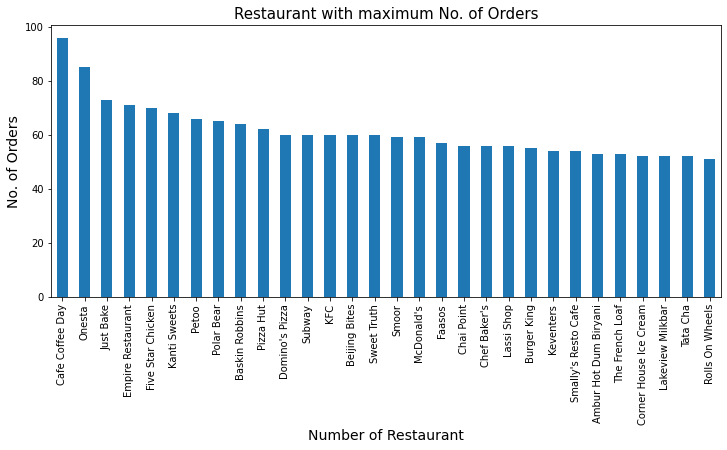

In [29]:
plt.figure(figsize = (12,5))
data = Zomato['name'].value_counts()[:30]
data.plot(kind = 'bar')
plt.xlabel('Number of Restaurant', size = 14)
plt.ylabel('No. of Orders', size = 14)
plt.title('Restaurant with maximum No. of Orders', fontsize=15)
plt.show


**Number of restaurants haveing online order facility**

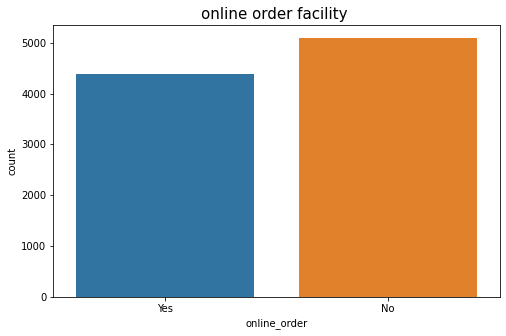

In [30]:
data = Zomato[['name','online_order']].drop_duplicates()

plt.figure(figsize = (8,5))
ax = sns.countplot(x = "online_order", data=data).set_title('online order facility ', fontsize =15)
plt.show()

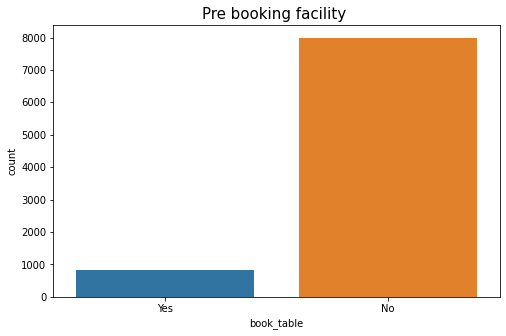

In [31]:
data = Zomato[['name','book_table']].drop_duplicates()

plt.figure(figsize = (8,5))
ax = sns.countplot(x = "book_table", data=data).set_title('Pre booking facility ', fontsize =15)
plt.show()

**Top Location got higher Number of orders**

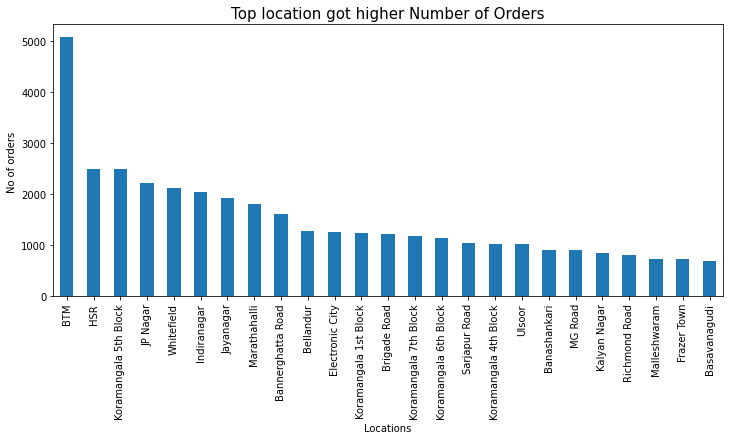

In [32]:
plt.figure(figsize = (12,5))
data = Zomato.location.value_counts()[0:25]
data.plot(kind='bar')
plt.xlabel('Locations')
plt.ylabel('No of orders ')
plt.title('Top location got higher Number of Orders', size = 15)
plt.show()

Above visualization BTM Has higher number of Orders have and HSR, jp Nagar, Whitefield, Indianagar, jayanagar also have high numnber of orders

**Most common Ratings for orders**

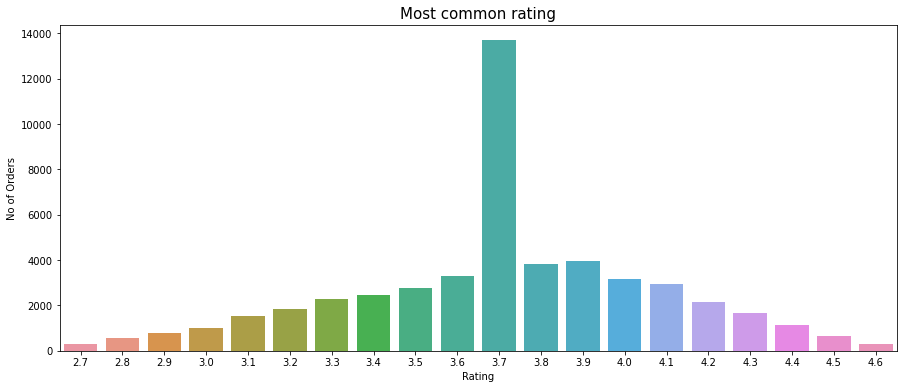

In [33]:
data = Zomato.rate.value_counts().reset_index()[0:20]

plt.figure(figsize = (15,6))
sns.barplot(x=data['index'], y=data['rate'])

plt.xlabel('Rating')
plt.ylabel('No of Orders')
plt.title('Most common rating', size=15)
plt.show()

**Common Approximate Costs for meal of two people**

In [34]:
data = pd.DataFrame(Zomato["approx_cost"].value_counts().reset_index()[:20])

data.columns=["approx_cost","count"]
data = data.set_index('approx_cost')

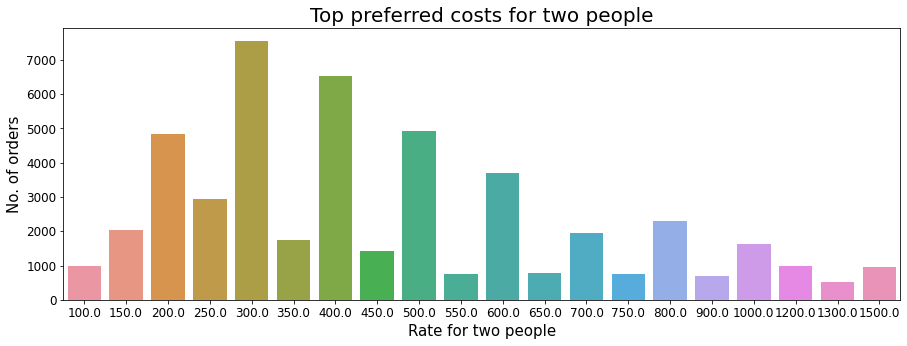

In [35]:
plt.figure(figsize = (15,5))
sns.barplot(x = data.index, y = data['count'])
plt.xlabel('Rate for two people', size = 15)
plt.ylabel('No. of orders', size = 15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top preferred costs for two people', size = 20)
plt.show()


**Leble Encoding**

In [36]:
Zomato["online_order"] = Zomato['online_order'].replace({'Yes':1, 'No': 0})
Zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [37]:
Zomato['book_table'] = Zomato['book_table'].replace({'Yes': 1, 'No': 0 })
Zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [38]:
Zomato.describe().T

,count,mean,std,min,25%,50%,75%,max
online_order,51148.0,0.592614,0.491353,0.0,0.0,1.0,1.0,1.0
book_table,51148.0,0.126085,0.331948,0.0,0.0,0.0,0.0,1.0
rate,51148.0,3.701623,0.395188,1.8,3.5,3.7,3.9,4.9
votes,51148.0,284.917885,806.495210,0.0,7.0,41.0,199.0,16832.0
approx_cost,51148.0,556.043736,439.555299,40.0,300.0,400.0,700.0,6000.0


**lets do label ecoding as we have most of the data as object type**


In [39]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

In [40]:
list = ['rest_type','cuisines','area','location']
for i in list:
    Zomato[i] = le.fit_transform(Zomato[i])
    
    
Zomato.head(20)


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,1,27,2145,800.0,1
1,Spice Elephant,1,0,4.1,787,1,27,947,800.0,1
2,San Churro Cafe,1,0,3.8,918,1,22,761,800.0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,2539,300.0,1
4,Grand Village,0,0,3.8,166,4,27,2174,600.0,1
5,Timepass Dinner,1,0,3.8,286,4,27,1811,600.0,1
6,Rosewood International Hotel - Bar & Restaurant,0,0,3.6,8,57,27,2196,800.0,1
7,Onesta,1,1,4.6,2556,1,29,2309,600.0,1
8,Penthouse Cafe,1,0,4.0,324,1,19,737,700.0,1
9,Smacznego,1,0,4.2,504,1,19,762,550.0,1


# **Feature Selection**

In [41]:
Zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,1,1,4.1,775,1,27,2145,800.0,1
1,Spice Elephant,1,0,4.1,787,1,27,947,800.0,1
2,San Churro Cafe,1,0,3.8,918,1,22,761,800.0,1
3,Addhuri Udupi Bhojana,0,0,3.7,88,1,78,2539,300.0,1
4,Grand Village,0,0,3.8,166,4,27,2174,600.0,1


In [42]:
X = Zomato.iloc[:,[1,2,4,5,6,8]] 
X.head()

,online_order,book_table,votes,location,rest_type,approx_cost
0,1,1,775,1,27,800.0
1,1,0,787,1,27,800.0
2,1,0,918,1,22,800.0
3,0,0,88,1,78,300.0
4,0,0,166,4,27,600.0


In [43]:
Y = Zomato.iloc[:,[3]].values
Y

array([[4.1],
       [4.1],
       [3.8],
       ...,
       [3.7],
       [4.3],
       [3.4]])

# **Splitting Data**

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size = 0.2, random_state=45)


In [45]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40918, 6), (10230, 6), (40918, 1), (10230, 1))

**Applying ML Algorithm**

**Linear Regression**

In [46]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.tree import DecisionTreeRegressor

In [47]:
Lr = LinearRegression()
Lr.fit(X_train,Y_train)

LinearRegression()

In [48]:
Lr_predict = Lr.predict(X_test)
Lr_predict[:10]

array([[3.67110591],
       [3.59204513],
       [3.85605116],
       [3.64707713],
       [3.56011859],
       [3.58249403],
       [4.16459547],
       [3.72528351],
       [3.66583795],
       [3.59535192]])

In [49]:
from sklearn.metrics import r2_score


In [50]:
lin_regressor_score = r2_score(Y_test,Lr_predict)*100
print("Accuracy Score for Linear Regression is: ",lin_regressor_score)

Accuracy Score for Linear Regression is:  27.39178596917702


**KNN Regression**

In [51]:
from sklearn.neighbors import KNeighborsRegressor


In [52]:
knn=KNeighborsRegressor(n_neighbors=5)

In [53]:
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [54]:
knn_predict = knn.predict(X_test)
knn_predict

array([[3.7 ],
       [4.1 ],
       [4.3 ],
       ...,
       [3.7 ],
       [4.2 ],
       [4.16]])

In [55]:
knn_score = r2_score(Y_test,knn_predict)*100

In [56]:
print("KNN Accuracy_score ", knn_score)

KNN Accuracy_score  74.52975620674496


**Random Forest Regression**

In [57]:
from sklearn.ensemble import RandomForestRegressor


In [58]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)


<ipython-input-58-30bae5b2842b>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train,Y_train)


RandomForestRegressor()

In [59]:
RF_predict = RF.predict(X_test)
RF_predict

array([3.7  , 4.1  , 4.3  , ..., 3.7  , 4.2  , 4.273])

In [60]:
RF_score = r2_score(Y_test,RF_predict)*100
RF_score

91.30418070136751

In [61]:
print("RandomForestRegressor Accuracy_score ", RF_score)

RandomForestRegressor Accuracy_score  91.30418070136751


**Extra Tree Regressor**

In [62]:
from sklearn.ensemble import ExtraTreesRegressor


In [63]:
extratree_regressor = ExtraTreesRegressor()


In [64]:
extratree_regressor.fit(X_train,Y_train)


<ipython-input-64-f3409f4e40df>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  extratree_regressor.fit(X_train,Y_train)


ExtraTreesRegressor()

In [65]:
extratree_regressor_predict = extratree_regressor.predict(X_test)


In [66]:
extratree_regressor_score = r2_score(Y_test,extratree_regressor_predict)*100
print("Accuracy for Extra Tree Regressor is:",extratree_regressor_score)


Accuracy for Extra Tree Regressor is: 93.51804273137012


In [67]:
#comp = pd.DataFrame({"Actual":Y_test,"Predicted":np.round(extratree_regressor_predict,2)})
#comp
actual = Y_test.flatten()
predicted = np.round(extratree_regressor_predict, 2).flatten()

comp = pd.DataFrame({"Actual": actual, "Predicted": predicted})
comp

,Actual,Predicted
0,3.7,3.70
1,4.1,4.10
2,4.3,4.30
3,3.0,3.00
4,3.2,3.37
...,...,...
10225,3.9,3.90
10226,3.7,3.70
10227,3.7,3.70
10228,4.2,4.20


In [68]:
extratree_regressor.score(X_train,Y_train)

0.991587230253288

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = extratree_regressor.predict(X_test)

# Calculate the R-squared score between the predicted and true values
r2 = r2_score(Y_test, y_pred)
r2


0.9351804273137012

In [71]:
#import pickle
#pickle.dump(extratree_regressor,open('model.pkl','wb'))
#model = pickle.load(open('model.pkl','rb'))

In [72]:
import joblib


In [73]:
# Save the model to a file
joblib.dump(extratree_regressor, 'extratree_regressor.joblib',compress=True)


['extratree_regressor.joblib']

In [74]:
# Load the model from the file
loaded_model = joblib.load('extratree_regressor.joblib')